# Prabal Ghosh

# Lab= TP boosting
## dataset: MNIST

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("nb of train samples",len(y_train))


nb of train samples 60000


In [2]:
#quelques imports pour la suite
import numpy as np
from sklearn.utils import shuffle
import sklearn
import matplotlib.pyplot as plt

We choose 2 classes only for the binary classification: '4' and '8'. You can make another choice.

In [3]:
# class of '4'
x_train4 = x_train[y_train==4,:]
# class of '8'
x_train8 = x_train[y_train==8,:]

# together
x_trainBinaire = np.append(x_train4,x_train8,axis=0)
# positive class: '8' ; negative class: '4' 
y_trainBinaire = np.append(np.full(len(x_train4),-1), np.full(len(x_train8),1))

print(x_trainBinaire.shape, y_trainBinaire.shape)

# shuffle together
(x_trainBinaire,y_trainBinaire) = shuffle(x_trainBinaire,y_trainBinaire,random_state=0)

(11693, 28, 28) (11693,)


## simple boosting on the data


In [4]:
n = x_trainBinaire.shape[0]
x_trainBinaire = x_trainBinaire.reshape(n,-1)
print(x_trainBinaire.shape)

(11693, 784)


In [5]:
# pip install --upgrade scikit-learn


In [6]:
# pip install --force-reinstall scikit-learn


In [7]:
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import  plot_confusion_matrix

from sklearn.utils import shuffle

In [8]:
## boosting (Adaboost)
# object boosting
myboosting = sklearn.ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME.R')

# learning on the training dataset
myboosting.fit(x_trainBinaire,y_trainBinaire)
# prediction
y_predBinaire = myboosting.predict(x_trainBinaire)
print('confusion matrix on train data',confusion_matrix(y_trainBinaire,y_predBinaire))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


confusion matrix on train data [[5842    0]
 [   0 5851]]


In [9]:
## boosting (Adaboost)
# object boosting
myboosting = sklearn.ensemble.AdaBoostClassifier(n_estimators=120, learning_rate=1.0, algorithm='SAMME.R')

# learning on the training dataset
myboosting.fit(x_trainBinaire,y_trainBinaire)
# prediction
y_predBinaire = myboosting.predict(x_trainBinaire)
print('confusion matrix on train data',confusion_matrix(y_trainBinaire,y_predBinaire))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


confusion matrix on train data [[5838    4]
 [   7 5844]]


We printed the confusion matrix on train dataset. What is the influence of the variable n_estimators ?

## AdaBoost Parameters

- **n_estimators** (int, default=50):
  - The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).
  - **When n_estimators is set too high, the model may start memorizing the training data, leading to overfitting. On the other hand, if n_estimators is too low, the model may not be able to capture all the underlying patterns in the data, resulting in underfitting.**




/
- **learning_rate** (float, default=1.0):
  - Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the `learning_rate` and `n_estimators` parameters. Values must be in the range (0.0, inf).
  - **We can choose low learning_rate to reduce overfitting but it will slow down the learning process**


- **Thats why I choose n_estimators =120 and learning_rate =1.0**


It is possible to display nicely the confusion matrix. For that, read the documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html.

Text(0.5, 1.0, 'Confusion matrix on training data')

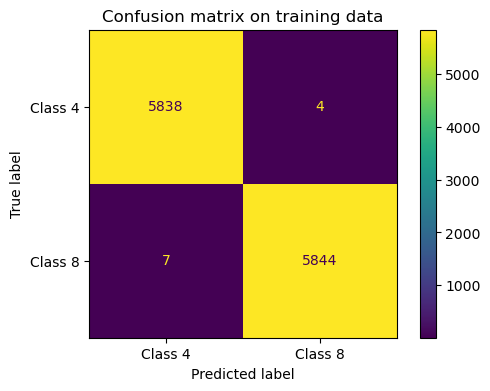

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_trainBinaire, y_predBinaire)

fig, ax = plt.subplots(figsize=(6, 4)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 4', 'Class 8'])
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')

Now compute the confusion matrix on the test dataset

(1956, 28, 28) (1956,)


Text(0.5, 1.0, 'Confusion matrix on test data')

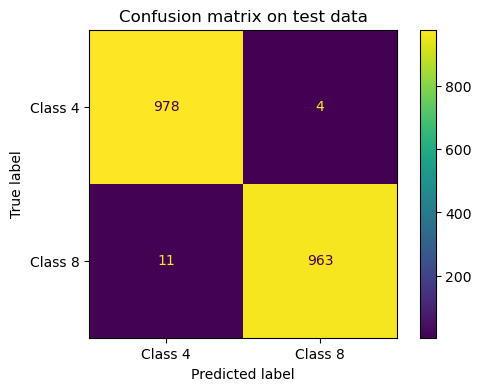

In [11]:
# TO BE WRITTEN
# pre-processing of test dataset (2 classes ....)

# class of '4'
x_test4 = x_test[y_test==4,:]
# class of '8'
x_test8 = x_test[y_test==8,:]

# together
x_testBinaire = np.append(x_test4,x_test8,axis=0)
# positive class: '8' ; negative class: '4' 
y_testBinaire = np.append(np.full(len(x_test4),-1), np.full(len(x_test8),1))

print(x_testBinaire.shape, y_testBinaire.shape)

nT = x_testBinaire.shape[0]
x_testBinaire = x_testBinaire.reshape(nT,-1)




#prediction

y_test_pred_Binaire = myboosting.predict(x_testBinaire)





# confusion matrix computation and display

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm_test = confusion_matrix(y_testBinaire, y_test_pred_Binaire)

fig, ax = plt.subplots(figsize=(6, 4)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Class 4', 'Class 8'])
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on test data')


In [12]:
#choose classes 4 and 8
x_test4 = x_test[y_test==4,:]
x_test8 = x_test[y_test==8,:]

x_testBinaire = np.append(x_test4,x_test8,axis=0)
y_testBinaire = np.append(np.full(len(x_test4),-1), np.full(len(x_test8),1))

print(x_testBinaire.shape, y_testBinaire.shape)

(x_testBinaire,y_testBinaire) = shuffle(x_testBinaire,y_testBinaire,random_state=0)

nT = x_testBinaire.shape[0]
x_testBinaire = x_testBinaire.reshape(nT,-1)

# calcul de la matrice de confusion et affichage

y_predBinaire = myboosting.predict(x_testBinaire)
print('confusion matrix',confusion_matrix(y_testBinaire,y_predBinaire))

# disp = plot_confusion_matrix(myboosting, x_testBinaire, y_testBinaire,
#                                  display_labels=['class 4','class 8'],
#                                  cmap=plt.cm.Blues,
#                                  normalize=None)
# disp.ax_.set_title('Matrice de confusion')

(1956, 28, 28) (1956,)
confusion matrix [[978   4]
 [ 11 963]]


## boosting on the 10 classes from MNIST:


In [13]:
n = x_train.shape[0]
xTrain = x_train.reshape(n,-1)
n = x_test.shape[0]
xTest = x_test.reshape(n,-1)

In [14]:
## boosting (Adaboost)
# object boosting
# myboosting = sklearn.ensemble.AdaBoostClassifier(n_estimators=200, learning_rate=1, algorithm='SAMME.R')
myboosting = sklearn.ensemble.AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME')

# learning on the training dataset
myboosting.fit(xTrain,y_train)
# prediction
y_pred = myboosting.predict(xTest)
print('confusion matrix on test data',confusion_matrix(y_test,y_pred))

confusion matrix on test data [[ 600    2    7    3    0  352    5    4    6    1]
 [   0 1009   57   21    1    1    4    5   37    0]
 [  15   44  703   19   13   27  103   22   77    9]
 [  20    2   36  675    1  105    8   21  126   16]
 [   1    0   10   14  664    8   13   31   38  203]
 [  15   13   10  172   11  506   20   13  103   29]
 [  20    5   33   10   67   43  741    0   29   10]
 [   4   14   35   10   13    6    1  858   17   70]
 [   6   16   17   53   10   39   15   16  774   28]
 [   4    6    7   43  122   14    1  105   59  648]]


In [15]:
print(myboosting.estimators_[0])

DecisionTreeClassifier(max_depth=1, random_state=586802872)


In [16]:
from sklearn import tree

[Text(0.5, 0.75, 'x[350] <= 131.5\ngini = 0.9\nsamples = 60000\nvalue = [0.099, 0.112, 0.099, 0.102, 0.097, 0.09, 0.099, 0.104\n0.098, 0.099]'),
 Text(0.25, 0.25, 'gini = 0.881\nsamples = 39160\nvalue = [0.091, 0.01, 0.08, 0.022, 0.089, 0.054, 0.08, 0.096\n0.051, 0.08]'),
 Text(0.75, 0.25, 'gini = 0.821\nsamples = 20840\nvalue = [0.008, 0.102, 0.02, 0.08, 0.008, 0.036, 0.019, 0.008\n0.046, 0.02]')]

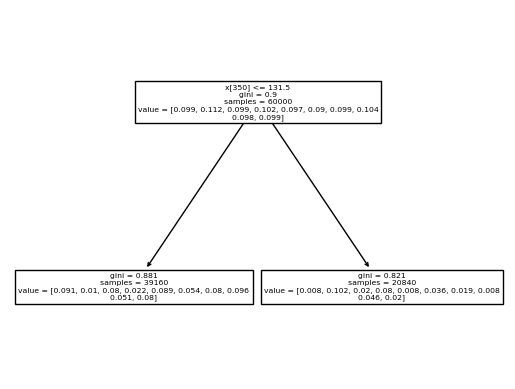

In [17]:
tree.plot_tree(myboosting.estimators_[0])

## binary boosting using Haar filters
The first step is the preparation of the data.

### Haar filters

In [18]:
from skimage import feature
from skimage import transform

For Haar filters, it is possible to generate them from the library tools or to build them by hand.

In [19]:
# automatic generation from:
#       'type-2-x' and 'type-2-y'
# and images dimension: 28x28
feat_coord, feat_type = feature.haar_like_feature_coord(4,4, ['type-2-x','type-2-y'])

In [20]:
feat_type

array(['type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2

How many filters ? And compared to pixels number ?

Answer =
### Number of filters is 80

### Number of Pixels is 28X28= 784



In [21]:
print(feat_coord)


[list([[(0, 0), (0, 0)], [(0, 1), (0, 1)]])
 list([[(0, 0), (0, 1)], [(0, 2), (0, 3)]])
 list([[(0, 0), (1, 0)], [(0, 1), (1, 1)]])
 list([[(0, 0), (1, 1)], [(0, 2), (1, 3)]])
 list([[(0, 0), (2, 0)], [(0, 1), (2, 1)]])
 list([[(0, 0), (2, 1)], [(0, 2), (2, 3)]])
 list([[(0, 0), (3, 0)], [(0, 1), (3, 1)]])
 list([[(0, 0), (3, 1)], [(0, 2), (3, 3)]])
 list([[(0, 1), (0, 1)], [(0, 2), (0, 2)]])
 list([[(0, 1), (1, 1)], [(0, 2), (1, 2)]])
 list([[(0, 1), (2, 1)], [(0, 2), (2, 2)]])
 list([[(0, 1), (3, 1)], [(0, 2), (3, 2)]])
 list([[(0, 2), (0, 2)], [(0, 3), (0, 3)]])
 list([[(0, 2), (1, 2)], [(0, 3), (1, 3)]])
 list([[(0, 2), (2, 2)], [(0, 3), (2, 3)]])
 list([[(0, 2), (3, 2)], [(0, 3), (3, 3)]])
 list([[(1, 0), (1, 0)], [(1, 1), (1, 1)]])
 list([[(1, 0), (1, 1)], [(1, 2), (1, 3)]])
 list([[(1, 0), (2, 0)], [(1, 1), (2, 1)]])
 list([[(1, 0), (2, 1)], [(1, 2), (2, 3)]])
 list([[(1, 0), (3, 0)], [(1, 1), (3, 1)]])
 list([[(1, 0), (3, 1)], [(1, 2), (3, 3)]])
 list([[(1, 1), (1, 1)], [(1, 2)

In [22]:
# # images transformation: we apply all filters
# cpt=0

# for image in x_trainBinaire:
#     # integral image computation
    
    

#     int_image = transform.integral_image(image)
#     print(int_image.shape)
#     # Haar filters computation
#     features = feature.haar_like_feature(int_image, 0, 0, 28, 28,feature_type=feat_type,feature_coord=feat_coord)
#     if cpt%1000 == 0:
#         ftrain = [features]
#     else:
#         ftrain = np.append(ftrain,[features],axis=0)
#     cpt += 1

You may encounter size problems. Try to remove some filters. Which ones ? How many ? That's the question ....

**I segregated the filters into categories in X and y, each containing 40 filters. In total, there were 80 filters, which I calculated using the length of feat_coord.**

Here are the three types of filters I created:

- **One filter exclusively comprised of type-2-x.**
- **Another filter consisting solely of type-2-y.**
- **A third filter generated randomly.**

These distinct filter sets enable targeted analysis and comparison, facilitating a deeper understanding of the data and its characteristics.


# binary boosting with Haar filters
Compare the different options for the filters. Compare with the first boosting in this notebook. 

## Using only X filters

In [23]:
filtered_typey_x = np.where(feat_type != 'type-2-y')[0]
feat_type_filtered_x = feat_type[filtered_typey_x]
feat_coord_filtered_x = np.array([feat_coord[i] for i in filtered_typey_x])

In [24]:
feat_type_filtered_x

array(['type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x',
       'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x', 'type-2-x'],
      dtype=object)

In [25]:
filtered_typey_x


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [26]:
print(feat_coord_filtered_x)

[[[[0 0]
   [0 0]]

  [[0 1]
   [0 1]]]


 [[[0 0]
   [0 1]]

  [[0 2]
   [0 3]]]


 [[[0 0]
   [1 0]]

  [[0 1]
   [1 1]]]


 [[[0 0]
   [1 1]]

  [[0 2]
   [1 3]]]


 [[[0 0]
   [2 0]]

  [[0 1]
   [2 1]]]


 [[[0 0]
   [2 1]]

  [[0 2]
   [2 3]]]


 [[[0 0]
   [3 0]]

  [[0 1]
   [3 1]]]


 [[[0 0]
   [3 1]]

  [[0 2]
   [3 3]]]


 [[[0 1]
   [0 1]]

  [[0 2]
   [0 2]]]


 [[[0 1]
   [1 1]]

  [[0 2]
   [1 2]]]


 [[[0 1]
   [2 1]]

  [[0 2]
   [2 2]]]


 [[[0 1]
   [3 1]]

  [[0 2]
   [3 2]]]


 [[[0 2]
   [0 2]]

  [[0 3]
   [0 3]]]


 [[[0 2]
   [1 2]]

  [[0 3]
   [1 3]]]


 [[[0 2]
   [2 2]]

  [[0 3]
   [2 3]]]


 [[[0 2]
   [3 2]]

  [[0 3]
   [3 3]]]


 [[[1 0]
   [1 0]]

  [[1 1]
   [1 1]]]


 [[[1 0]
   [1 1]]

  [[1 2]
   [1 3]]]


 [[[1 0]
   [2 0]]

  [[1 1]
   [2 1]]]


 [[[1 0]
   [2 1]]

  [[1 2]
   [2 3]]]


 [[[1 0]
   [3 0]]

  [[1 1]
   [3 1]]]


 [[[1 0]
   [3 1]]

  [[1 2]
   [3 3]]]


 [[[1 1]
   [1 1]]

  [[1 2]
   [1 2]]]


 [[[1 1]
   [2 1]]

  [[1 2]
   [2

In [27]:
# for you
# Processing images
ftrain_x = []
cpt = 0

for image in x_trainBinaire:
    # Reshaping each image back to 28x28
    image_reshaped = image.reshape(28, 28)
    # Computing the integral image
    int_image = transform.integral_image(image_reshaped)
    # Haar features computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28, feature_type=feat_type_filtered_x, feature_coord=feat_coord_filtered_x)
    ftrain_x.append(features)
    cpt += 1
    if cpt % 1000 == 0: # to keep count of the images per 1000
        print(f"Processed {cpt} images")

# Converting ftrain to a numpy array
ftrain_x = np.array(ftrain_x)

ftrain_x.shape



Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images


(11693, 40)

In [28]:
# # for you

# # images transformation: we apply all filters
# cpt=0
# ftrain = []

# for image in x_trainBinaire:
#     # integral image computation
#     image_reshaped = image.reshape(28, 28)
#     int_image = transform.integral_image(image_reshaped)
    
    

# #     int_image = transform.integral_image(image)
#     print(int_image.shape)
#     # Haar filters computation
#     features = feature.haar_like_feature(int_image, 0, 0, 28, 28,feature_type=feat_type,feature_coord=feat_coord)
#     if cpt%1000 == 0:
#         ftrain = [features]
#     else:
#         ftrain = np.append(ftrain,[features],axis=0)
#     cpt += 1

In [29]:
# for you  !
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import shuffle


ftrain_x, y_trainBinaire = shuffle(ftrain_x, y_trainBinaire, random_state=0)
haar_boosting = AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME.R')
haar_boosting.fit(ftrain_x, y_trainBinaire)
y_predHaar = haar_boosting.predict(ftrain_x)

# Confusion matrix
print('Confusion matrix on train data with Haar features:', confusion_matrix(y_trainBinaire, y_predHaar))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix on train data with Haar features: [[   0 5842]
 [   0 5851]]


Text(0.5, 1.0, 'Confusion matrix on training data')

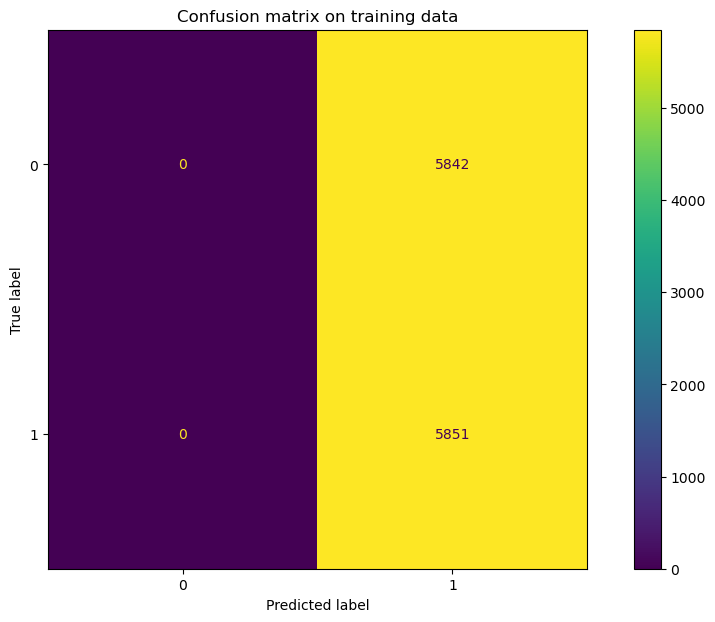

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_trainBinaire, y_predHaar)

fig, ax = plt.subplots(figsize=(12, 7)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')

## Using only Y filters

In [31]:
filtered_type_y = np.where(feat_type != 'type-2-x')[0]
feat_type_filtered_y = feat_type[filtered_type_y]
feat_coord_filtered_y = np.array([feat_coord[i] for i in filtered_type_y])

In [32]:
filtered_type_y

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79], dtype=int64)

In [33]:
filtered_type_y.shape

(40,)

In [34]:
feat_type_filtered_y

array(['type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y',
       'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y', 'type-2-y'],
      dtype=object)

In [35]:
feat_coord_filtered_y

array([[[[0, 0],
         [0, 0]],

        [[1, 0],
         [1, 0]]],


       [[[0, 0],
         [0, 1]],

        [[1, 0],
         [1, 1]]],


       [[[0, 0],
         [0, 2]],

        [[1, 0],
         [1, 2]]],


       [[[0, 0],
         [0, 3]],

        [[1, 0],
         [1, 3]]],


       [[[0, 0],
         [1, 0]],

        [[2, 0],
         [3, 0]]],


       [[[0, 0],
         [1, 1]],

        [[2, 0],
         [3, 1]]],


       [[[0, 0],
         [1, 2]],

        [[2, 0],
         [3, 2]]],


       [[[0, 0],
         [1, 3]],

        [[2, 0],
         [3, 3]]],


       [[[0, 1],
         [0, 1]],

        [[1, 1],
         [1, 1]]],


       [[[0, 1],
         [0, 2]],

        [[1, 1],
         [1, 2]]],


       [[[0, 1],
         [0, 3]],

        [[1, 1],
         [1, 3]]],


       [[[0, 1],
         [1, 1]],

        [[2, 1],
         [3, 1]]],


       [[[0, 1],
         [1, 2]],

        [[2, 1],
         [3, 2]]],


       [[[0, 1],
         [1, 3]],

  

In [36]:
# for you
# Processing images
ftrain_y = []
cpt = 0

for image in x_trainBinaire:
    # Reshaping each image back to 28x28
    image_reshaped = image.reshape(28, 28)
    # Computing the integral image
    int_image = transform.integral_image(image_reshaped)
    # Haar features computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28, feature_type=feat_type_filtered_y, feature_coord=feat_coord_filtered_y)
    ftrain_y.append(features)
    cpt += 1
    if cpt % 1000 == 0:
        print(f"Processed {cpt} images")

# Converting ftrain to a numpy array
ftrain_y = np.array(ftrain_y)

ftrain_y.shape


Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images


(11693, 40)

In [37]:
# for you  !
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import shuffle


ftrain_y, y_trainBinaire = shuffle(ftrain_y, y_trainBinaire, random_state=0)
haar_boosting = AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME.R')
haar_boosting.fit(ftrain_y, y_trainBinaire)
y_predHaar = haar_boosting.predict(ftrain_y)

# Confusion matrix
print('Confusion matrix on train data with Haar features:', confusion_matrix(y_trainBinaire, y_predHaar))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix on train data with Haar features: [[   0 5842]
 [   0 5851]]


Text(0.5, 1.0, 'Confusion matrix on training data')

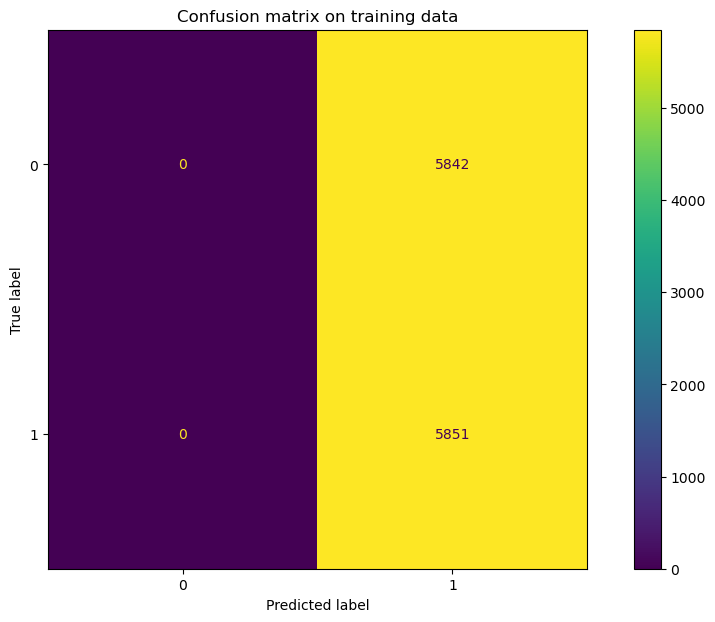

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_trainBinaire, y_predHaar)

fig, ax = plt.subplots(figsize=(12, 7)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')

# Other alternatives: build the filters. As for example:

In [39]:
feat_coord_alt = np.array([list([[(0, 0), (6, 0)], [(6, 6), (6, 6)]]),
       list([[(0, 0), (0, 6)], [(0, 13), (0, 20)]])])

feat_type_alt = np.array(['type-2-x', 'type-2-x'])


In [40]:
# for you
# Processing images
ftrain_alt = []
cpt = 0

for image in x_trainBinaire:
    # Reshaping each image back to 28x28
    image_reshaped = image.reshape(28, 28)
    # Computing the integral image
    int_image = transform.integral_image(image_reshaped)
    # Haar features computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28, feature_type=feat_type_alt, feature_coord=feat_coord_alt)
    ftrain_alt.append(features)
    cpt += 1
    if cpt % 1000 == 0: # to keep count of the images per 1000
        print(f"Processed {cpt} images")

# Converting ftrain to a numpy array
ftrain_alt = np.array(ftrain_alt)

ftrain_alt.shape


Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images


(11693, 2)

In [41]:
# for you  !
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import shuffle


ftrain_alt, y_trainBinaire = shuffle(ftrain_alt, y_trainBinaire, random_state=0)
haar_boosting = AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME.R')
haar_boosting.fit(ftrain_alt, y_trainBinaire)
y_predHaar = haar_boosting.predict(ftrain_alt)

# Confusion matrix
print('Confusion matrix on train data with Haar features:', confusion_matrix(y_trainBinaire, y_predHaar))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix on train data with Haar features: [[ 139 5703]
 [  84 5767]]


Text(0.5, 1.0, 'Confusion matrix on training data')

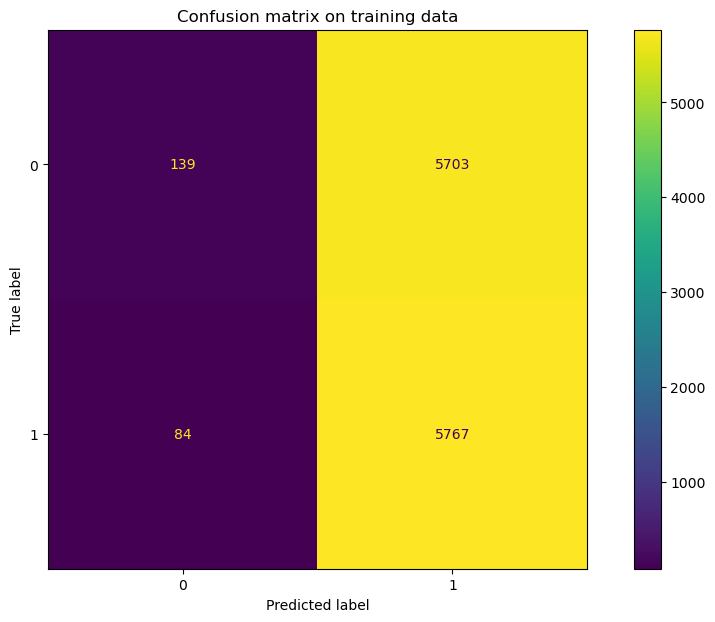

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_trainBinaire, y_predHaar)

fig, ax = plt.subplots(figsize=(12, 7)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')

**Observation:**

Boosting with Haar parameters appears to perform poorly when I divide the filters into X type and Y type. It correctly predicts the positive class (TP), but it fails to consider the negative class (TN).

However, there's an exception with the custom filter:

```python
feat_coord_e = np.array([list([[(0, 0), (6, 0)], [(6, 6), (6, 6)]]),
       list([[(0, 0), (0, 6)], [(0, 13), (0, 20)]])])

feat_type_e = np.array(['type-2-x', 'type-2-x'])
```

- **Interestingly, this custom filter showed some level of TP and TN, indicating a more balanced performance compared to the others.**

This observation highlights the importance of understanding the characteristics of different filters and their impact on boosting performance.




Applying Haar filters can take some time. Don't hesitate to save the results.

In [43]:
# code for saving and loading python object
import pickle
# save ftrain in the file 'features.bin'
with open('features.bin', 'wb') as output:
        pickle.dump(ftrain_alt, output, pickle.HIGHEST_PROTOCOL)
# load ftrain from the saved file
with open('features.bin', 'rb') as output:
        ftrain_alt = pickle.load(output)


## 10 classes boosting with Haar filters
Same questions

## Using only x filters

In [44]:
# for you
# Processing images
ftrain = []
cpt = 0

for image in xTrain:
    # Reshaping each image back to 28x28
    image_reshaped = image.reshape(28, 28)
    # Computing the integral image
    int_image = transform.integral_image(image_reshaped)
    # Haar features computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28, feature_type=feat_type_filtered_x, feature_coord=feat_coord_filtered_x)
    ftrain.append(features)
    cpt += 1
    if cpt % 3000 == 0: # to keep count of the images per 1000
        print(f"Processed {cpt} images")

# Converting ftrain to a numpy array
ftrain = np.array(ftrain)

ftrain.shape


Processed 3000 images
Processed 6000 images
Processed 9000 images
Processed 12000 images
Processed 15000 images
Processed 18000 images
Processed 21000 images
Processed 24000 images
Processed 27000 images
Processed 30000 images
Processed 33000 images
Processed 36000 images
Processed 39000 images
Processed 42000 images
Processed 45000 images
Processed 48000 images
Processed 51000 images
Processed 54000 images
Processed 57000 images
Processed 60000 images


(60000, 40)

In [45]:
# for you  !
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import shuffle


ftrain, y_train = shuffle(ftrain, y_train, random_state=0)
haar_boosting = AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME.R')
haar_boosting.fit(ftrain, y_train)
y_predHaar = haar_boosting.predict(ftrain)

# Confusion matrix
print('Confusion matrix on train data with Haar features:', confusion_matrix(y_train, y_predHaar))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix on train data with Haar features: [[   0 5922    0    0    0    0    1    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0 5956    2    0    0    0    0    0    0    0]
 [   0 6131    0    0    0    0    0    0    0    0]
 [   0 5842    0    0    0    0    0    0    0    0]
 [   0 5420    0    0    0    1    0    0    0    0]
 [   0 5914    0    0    0    0    4    0    0    0]
 [   0 6265    0    0    0    0    0    0    0    0]
 [   0 5851    0    0    0    0    0    0    0    0]
 [   0 5949    0    0    0    0    0    0    0    0]]


Text(0.5, 1.0, 'Confusion matrix on training data')

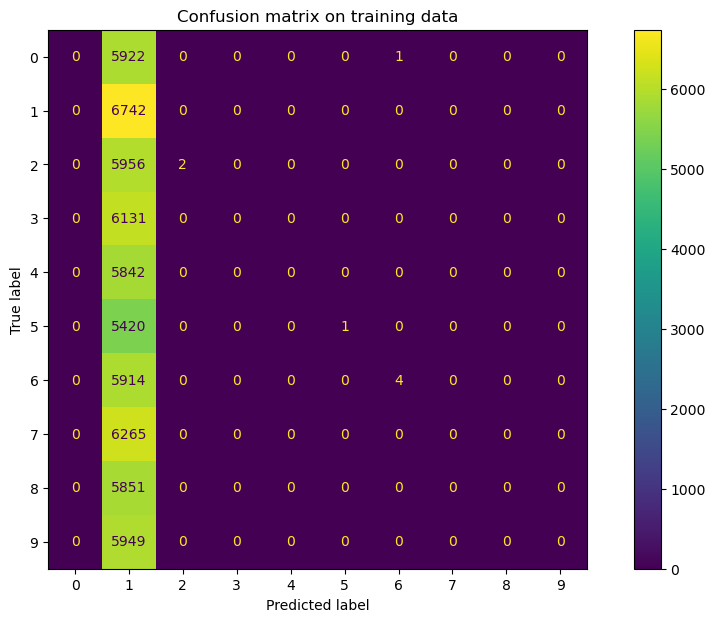

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train, y_predHaar)

fig, ax = plt.subplots(figsize=(12, 7)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')

# Using only Y filters

In [47]:
# for you
# Processing images
ftrain = []
cpt = 0

for image in xTrain:
    # Reshaping each image back to 28x28
    image_reshaped = image.reshape(28, 28)
    # Computing the integral image
    int_image = transform.integral_image(image_reshaped)
    # Haar features computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28, feature_type=feat_type_filtered_y, feature_coord=feat_coord_filtered_y)
    ftrain.append(features)
    cpt += 1
    if cpt % 3000 == 0: # to keep count of the images per 1000
        print(f"Processed {cpt} images")

# Converting ftrain to a numpy array
ftrain = np.array(ftrain)

ftrain.shape


Processed 3000 images
Processed 6000 images
Processed 9000 images
Processed 12000 images
Processed 15000 images
Processed 18000 images
Processed 21000 images
Processed 24000 images
Processed 27000 images
Processed 30000 images
Processed 33000 images
Processed 36000 images
Processed 39000 images
Processed 42000 images
Processed 45000 images
Processed 48000 images
Processed 51000 images
Processed 54000 images
Processed 57000 images
Processed 60000 images


(60000, 40)

In [48]:
# for you  !
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import shuffle


ftrain, y_train = shuffle(ftrain, y_train, random_state=0)
haar_boosting = AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME.R')
haar_boosting.fit(ftrain, y_train)
y_predHaar = haar_boosting.predict(ftrain)

# Confusion matrix
print('Confusion matrix on train data with Haar features:', confusion_matrix(y_train, y_predHaar))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix on train data with Haar features: [[   0 5922    1    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0 5957    1    0    0    0    0    0    0    0]
 [   0 6131    0    0    0    0    0    0    0    0]
 [   0 5841    0    0    1    0    0    0    0    0]
 [   0 5420    0    0    0    1    0    0    0    0]
 [   0 5915    0    0    0    0    3    0    0    0]
 [   0 6265    0    0    0    0    0    0    0    0]
 [   0 5851    0    0    0    0    0    0    0    0]
 [   0 5948    0    0    0    0    0    0    0    1]]


Text(0.5, 1.0, 'Confusion matrix on training data')

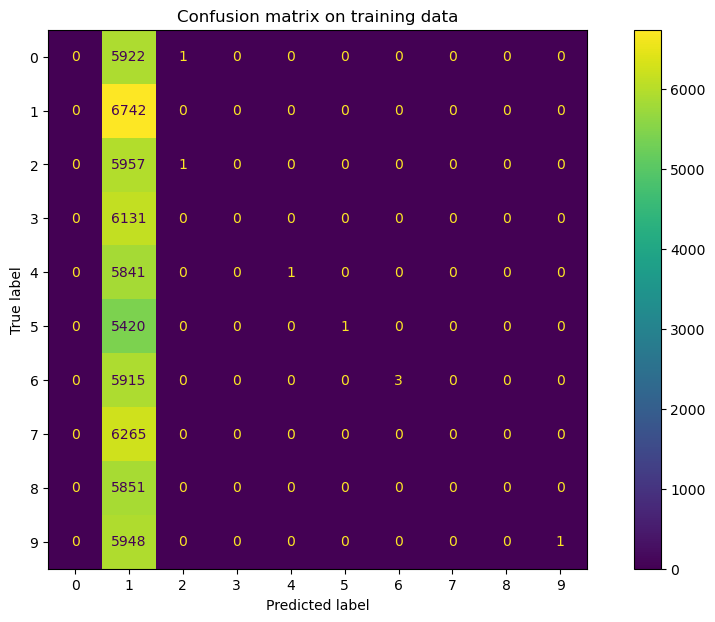

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train, y_predHaar)

fig, ax = plt.subplots(figsize=(12, 7)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')

# Other alternatives filters

In [50]:
# for you
# Processing images
ftrain = []
cpt = 0

for image in xTrain:
    # Reshaping each image back to 28x28
    image_reshaped = image.reshape(28, 28)
    # Computing the integral image
    int_image = transform.integral_image(image_reshaped)
    # Haar features computation
    features = feature.haar_like_feature(int_image, 0, 0, 28, 28, feature_type=feat_type_alt, feature_coord=feat_coord_alt)
    ftrain.append(features)
    cpt += 1
    if cpt % 3000 == 0: # to keep count of the images per 1000
        print(f"Processed {cpt} images")

# Converting ftrain to a numpy array
ftrain = np.array(ftrain)

ftrain.shape


Processed 3000 images
Processed 6000 images
Processed 9000 images
Processed 12000 images
Processed 15000 images
Processed 18000 images
Processed 21000 images
Processed 24000 images
Processed 27000 images
Processed 30000 images
Processed 33000 images
Processed 36000 images
Processed 39000 images
Processed 42000 images
Processed 45000 images
Processed 48000 images
Processed 51000 images
Processed 54000 images
Processed 57000 images
Processed 60000 images


(60000, 2)

In [51]:
# for you  !
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.utils import shuffle


ftrain, y_train = shuffle(ftrain, y_train, random_state=0)
haar_boosting = AdaBoostClassifier(n_estimators=120, learning_rate=1, algorithm='SAMME.R')
haar_boosting.fit(ftrain, y_train)
y_predHaar = haar_boosting.predict(ftrain)

# Confusion matrix
print('Confusion matrix on train data with Haar features:', confusion_matrix(y_train, y_predHaar))

C:\Users\praba\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion matrix on train data with Haar features: [[  17 5672    0    5    0    0   66   73   19   71]
 [  16 6482    0    8    0    0   61   62   22   91]
 [  12 5733    0    7    0    0   51   59   21   75]
 [   4 5906    0   10    0    0   55   62   24   70]
 [   4 5601    0   13    0    0   57   76   27   64]
 [  15 5208    0   12    0    0   43   58   22   63]
 [   8 5663    0    7    0    0   89   70   20   61]
 [   7 6030    0    7    0    0   34   90   19   78]
 [  10 5601    0    3    0    0   57   56   37   87]
 [  12 5698    0    5    0    0   54   55   15  110]]


Text(0.5, 1.0, 'Confusion matrix on training data')

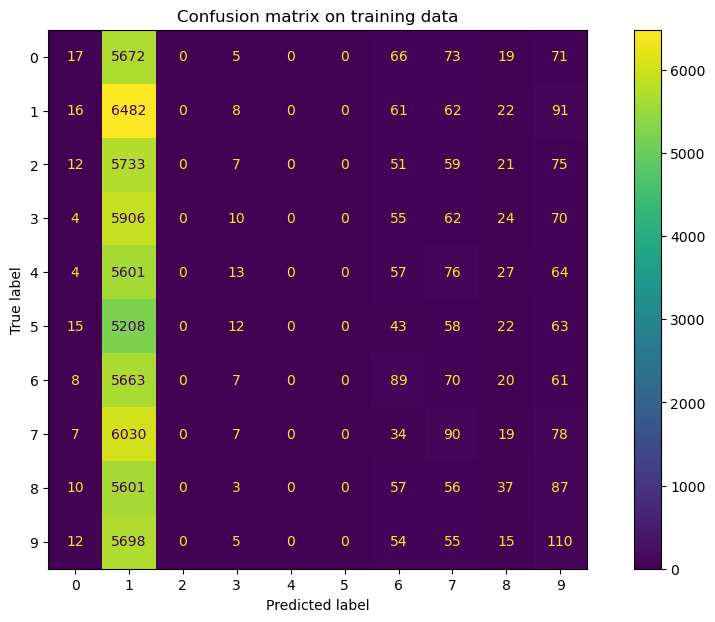

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train, y_predHaar)

fig, ax = plt.subplots(figsize=(12, 7)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix on training data')